In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


def show_chart(l:list, metric:str):
    metrics_map = {
        'acc': '5-Fold validation',
        'lot': 'Leave-one-subject-out'
    }
    df = pd.DataFrame(l, columns=['a','y','acc', 'lot', 'alg', 'ref'])
    df['acc'] = df['acc'].apply(float)
    df['lot'] = df['lot'].apply(float)
    df['y'] = df['y'].apply(float)
    df = df.sort_values('y')

    plt.figure()
    ax = plt.gca()
    df.plot.bar(x='a', y=metric, ax=ax)
    plt.title(metrics_map[metric])
    plt.ylabel('Accuracy')
    plt.xlabel('')
    plt.xticks(rotation=10)
    ax.get_legend().remove()

    ch=ax.get_children()
    b_list=list(filter(lambda x: isinstance(x, mpl.patches.Rectangle), ch))
    b_list[-2].set_color('green')

    plt.yscale('log')
    # plt.ylim(95, 100)
    plt.minorticks_off()
    if metric == 'lot':
        plt.yticks(range(95, 101), labels=[f'{x}%' for x in range(95, 101)])
    elif metric == 'acc':
        plt.yticks(range(95, 101), labels=[f'{x}%' for x in range(95, 101)])

    plt.savefig(f'{metric}.png', dpi=300)

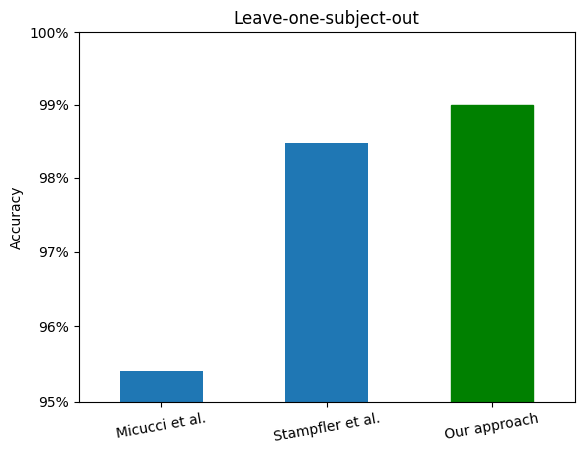

In [2]:
l = [x.split(',') for x in '''
Micucci et al.,2017.5,98.57,95.41,ANN,13
Stampfler et al.,2023,99.87,98.48,ResNet,14
Our approach,2023.5,99.70,98.99,BRNN,Our
'''.split('\n')[1:-1]]
metric = 'lot'
show_chart(l, metric)

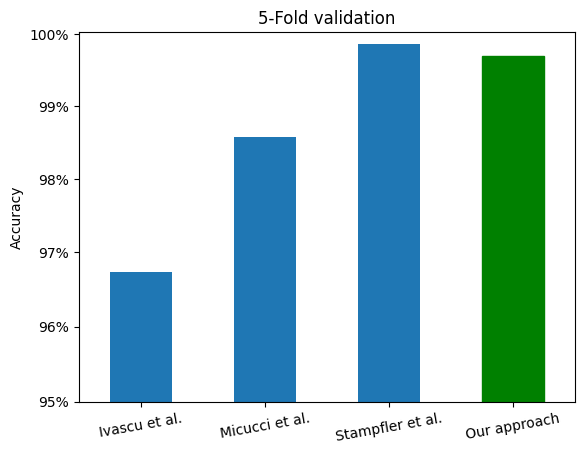

In [3]:
l = [x.split(',') for x in '''
Micucci et al.,2017.5,98.57,95.41,ANN,13
Ivascu et al.,2017,96.73,96.73,DNN,8
Stampfler et al.,2023,99.87,98.48,ResNet,14
Our approach,2023.5,99.70,98.99,BRNN,Our
'''.split('\n')[1:-1]]
metric = 'acc'
show_chart(l, metric)